# DS 3000 - Practicum 2 

**Student Name**: Ava Toren, Chloe Yang, Yuwen Pan, Nicolo Lagravinese

**Date**: March 1, 2025


### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

## Question 1: 
In your own words, formulate the Data Science problem that you were given.


Aircraft collisions with wildlife pose risks to aviation safety, causing damage, operational disruptions, and loss of life. This practicum analyzes the FAA Wildlife Strike Database (1990–2024) to identify trends, key contributing factors, and potential mitigation strategies. By performing data cleaning, exploratory analysis, and statistical testing, we aim to determine how factors like time of day, season, altitude, and aircraft type influence strike incidents. Additionally, we will assess trends over time, the impact of environmental changes, and species involvement. Insights from this analysis can help improve aviation safety and wildlife management policies.

## Question 2: Clean the data (10 pts)

Load the data using pandas and inspect it.

Perform the initial inspection of the data, its shape, types, etc.
Evaluate the dataset and perform at least three type of data preparation and justify the approach that is taken to prepare the data for analysis. Data prep can include, but is not limited to: handling missing values, data types, duplicates, etc. You will need to ensure that your data preparation addressed issues in at least 7 fields in the data.
Prepare meaningful* summary statistics for 3 continuous variables and 3 categorical variables.
Note: meaningful summary statistics explains the statistical summary of relevant fields in a coherent manner.


In [ ]:
import pandas as pd 
dataframe = pd.read_csv('Bird_Strikes_1990_2023.csv', low_memory = False)
dataframe

In [ ]:
# Specify the columns you want to keep
columns_to_keep = ['INCIDENT_DATE', 'INCIDENT_MONTH', 'INCIDENT_YEAR', 'AIRPORT_ID', 
                   'AIRPORT', 'LATITUDE', 'LONGITUDE', 'STATE', 'FAAREGION', 
                   'HEIGHT', 'SPEED', 'PHASE_OF_FLIGHT', 'NR_INJURIES', 'SPECIES']


# Create a new DataFrame with only the selected columns
dataframe = dataframe[columns_to_keep]
dataframe

In [ ]:
print("Shape of the dateset:", dataframe.shape)
print("\nColumn Data Types:\n", dataframe.dtypes)
print("\nMissing Values:\n", dataframe.isnull().sum())
print("\nSummary Statistics:\n", dataframe.describe(include="all"))

In [ ]:
#convert datatypes 
dataframe['INCIDENT_DATE'] = pd.to_datetime(dataframe['INCIDENT_DATE'])
dataframe

In [ ]:
#drop airports that are unkown 
dataframe = dataframe[dataframe['AIRPORT'] != 'UNKNOWN']
dataframe

In [ ]:
dataframe = dataframe[(dataframe['LATITUDE'] <= 90) & (dataframe['LATITUDE'] >= -90)]
dataframe

In [ ]:
print("\nMissing Values:\n", dataframe.isnull().sum())
print("\nSummary Statistics:\n", dataframe.describe(include="all"))

Continues Variables: 
1. The geographic latitude of the strike can take on a range of values between -90 and 90. The average latitude of 36.87 shows that most strikes occur in the continental US, aligning with popular airport locations. The max value of 71.29 suggests Northern regions like Alaska.
2. The geographic longitude of the strike can take on a range of values between -180 and 180. The mean of -91.53 shows incidents occur in the Western Hemisphere. The standard deviation of 24.69 suggests a larger spread of areas throughout the US.
3. The aircraft speed did not have a large variation of speeds as the standard deviation was about 46.68 knots. It had an average speed of 143.28 knots, so most aircrafts were traveling around that speed. It had a max speed of 1250 knots, which is extremely high and would be considered an outlier. 

Categorical Variables 
1. The most popular state was Texas with 24794 incidents. Texas is a very large geographic area with many airports and flight opertions. Texas also has a more diverse wildlife population, which could be why they have so many strikes. 
2. The most popular phase of flight is approach. The approach phase is when the aircraft is about to land at the airport. This makes sense because the aircraft is at lower altitudes where wildlife like birds are. This is also when aircrafts are close to airports, which tends to have more wildlife like birds. 
3. The most popular airport for wildlife strikes is Denver International Airport. This could be because Denver is one of the busiest airports in the US, so it naturally has more aircrafts. Denver is also located to a lot of wildlife habitats. Deneve

In [10]:
print(dataframe.columns.tolist())

['INCIDENT_DATE', 'INCIDENT_MONTH', 'INCIDENT_YEAR', 'AIRPORT_ID', 'AIRPORT', 'LATITUDE', 'LONGITUDE', 'STATE', 'FAAREGION', 'HEIGHT', 'SPEED', 'PHASE_OF_FLIGHT', 'NR_INJURIES', 'SPECIES']


## Question 3: Perform Exploratory Data Analysis (40 pts)

Perform an in-depth analysis by creating visualizations to understand the distribution and relationships within the data, while ensuring that your analysis and explanation of the results tell a story. It's important to select appropriate visualizations based on the type of data. Explain all results.

Analyze the proportion of incidents that occur each year.
Evaluate the distribution of bird strikes in each state and display the top 20 states.
What is the most common bird species that are involved in bird strikes.
Perform a comparative analysis of the annual aircraft damage for each phase of flight. Evaluate the results over the last 10 years to determine what patterns exist. Note: this requires a year over year analysis.
Analyze the frequency of bird strike incidents that occur on a monthly basis over the last 10 years. Analyze the results to determine when these incidents are more prevalent.  This question requires you to drill deeper into the analysis to determine if the distribution has changed over the last 10 years. Note: this requires a year over year analysis.
Perform ONE (1) additional analysis on the distribution. Ensure that you either : 1) perform a comparative analysis by evaluating 3 or more groups within the data or 2) perform a temporal analysis of the patterns over 10 or more years (this requires a year over year analysis of the patterns). Do not repeat any of the previous analysis.


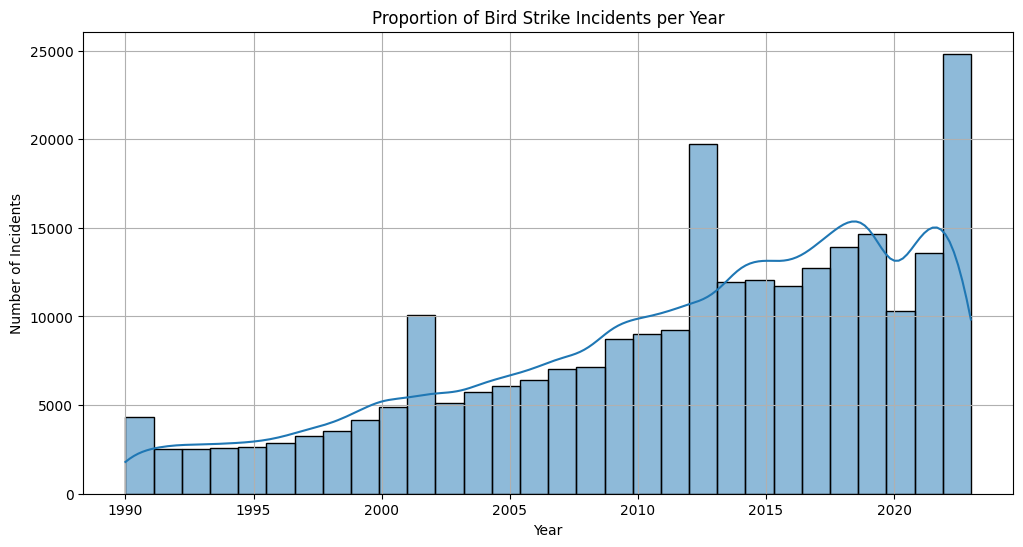

/var/folders/2v/lgy25gn56l9g0z5jqqxlhzw80000gn/T/ipykernel_4765/3932963780.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_counts.values, y=state_counts.index, palette="viridis")


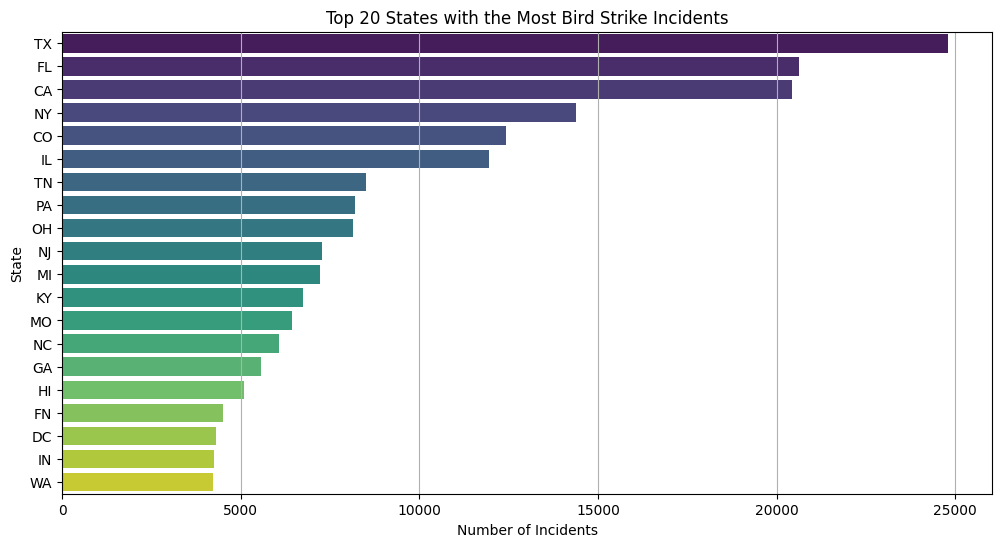

/var/folders/2v/lgy25gn56l9g0z5jqqxlhzw80000gn/T/ipykernel_4765/3932963780.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=species_counts.values, y=species_counts.index, palette="magma")


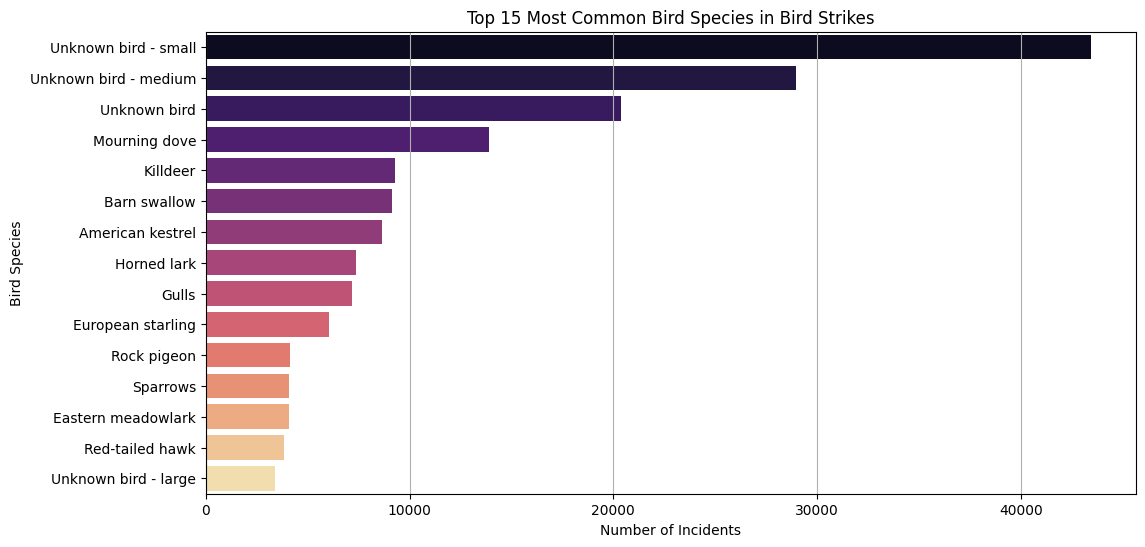

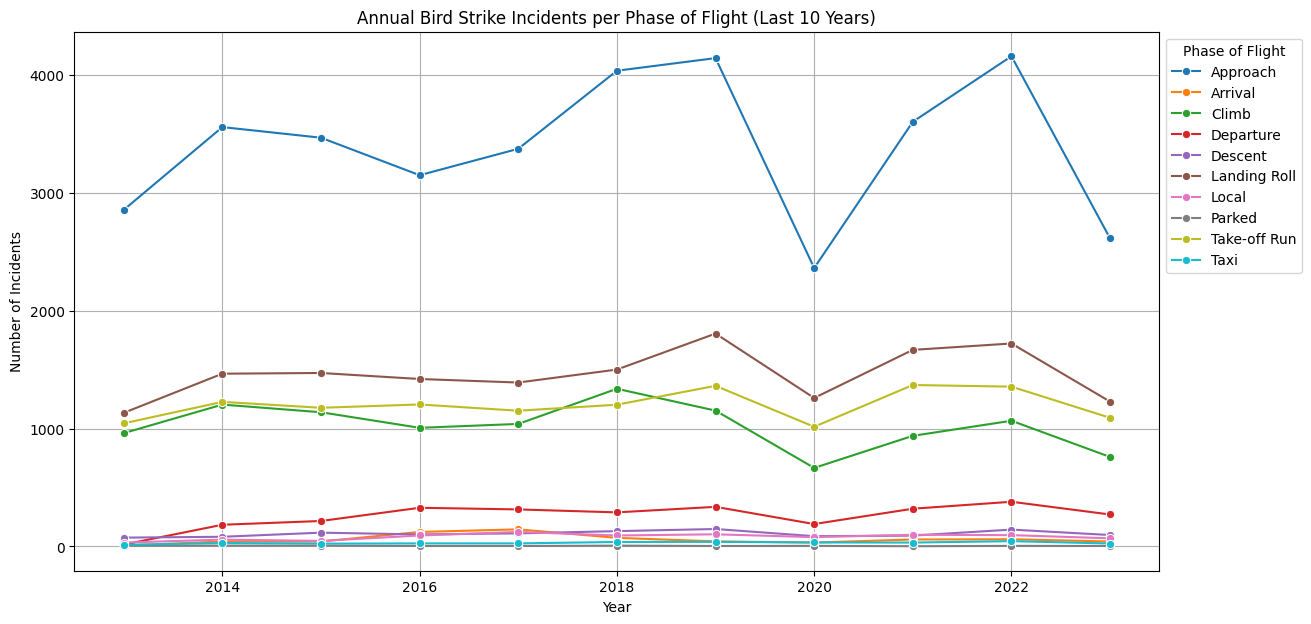

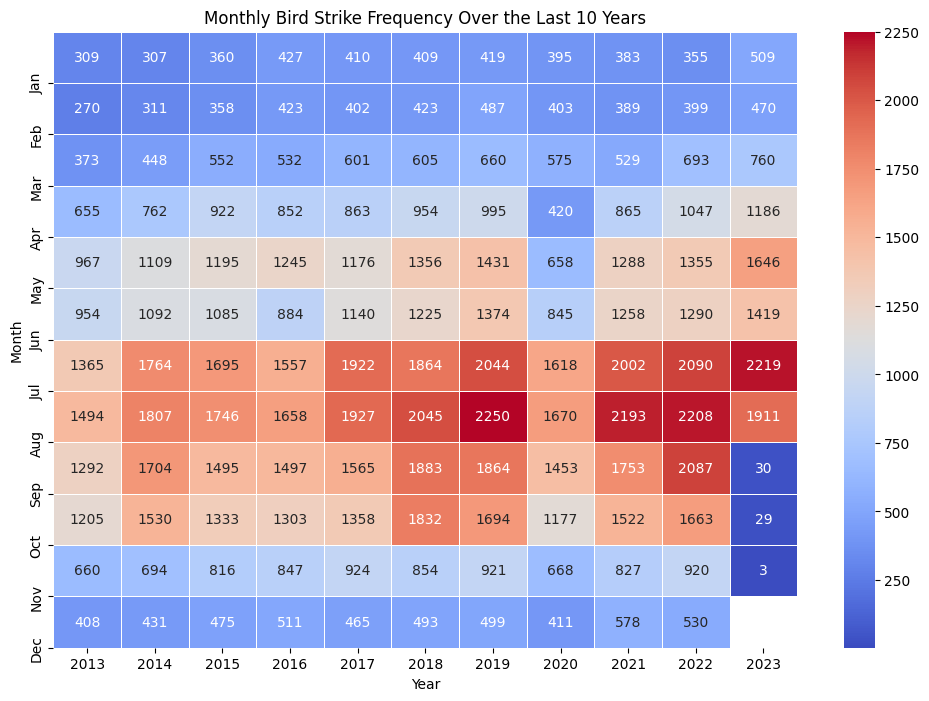

/var/folders/2v/lgy25gn56l9g0z5jqqxlhzw80000gn/T/ipykernel_4765/3932963780.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_airports.values, y=top_airports.index, palette="coolwarm")


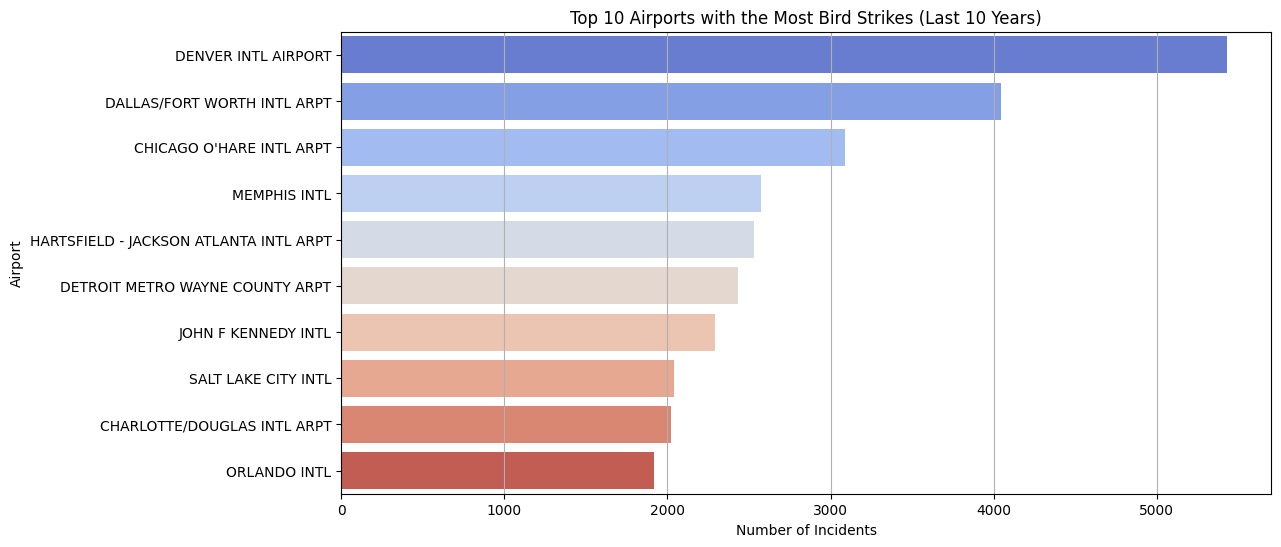

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------ Analysis 1: Proportion of incidents per year ------------------
plt.figure(figsize=(12, 6))
sns.histplot(dataframe['INCIDENT_YEAR'], bins=30, kde=True)
plt.title('Proportion of Bird Strike Incidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.show()

# ------------------ Analysis 2: Distribution of bird strikes in each state (Top 20) ------------------
state_counts = dataframe['STATE'].value_counts().nlargest(20)
plt.figure(figsize=(12, 6))
sns.barplot(x=state_counts.values, y=state_counts.index, palette="viridis")
plt.title('Top 20 States with the Most Bird Strike Incidents')
plt.xlabel('Number of Incidents')
plt.ylabel('State')
plt.grid(axis='x')
plt.show()

# ------------------ Analysis 3: Most common bird species involved in bird strikes ------------------
species_counts = dataframe['SPECIES'].value_counts().nlargest(15)
plt.figure(figsize=(12, 6))
sns.barplot(x=species_counts.values, y=species_counts.index, palette="magma")
plt.title('Top 15 Most Common Bird Species in Bird Strikes')
plt.xlabel('Number of Incidents')
plt.ylabel('Bird Species')
plt.grid(axis='x')
plt.show()

# ------------------ Analysis 4: Frequency of bird strikes by phase of flight (Last 10 years) ------------------
recent_years = dataframe[dataframe['INCIDENT_YEAR'] >= (dataframe['INCIDENT_YEAR'].max() - 10)]
phase_counts = recent_years.groupby(['INCIDENT_YEAR', 'PHASE_OF_FLIGHT']).size().reset_index(name='Incident_Count')
plt.figure(figsize=(14, 7))
sns.lineplot(data=phase_counts, x='INCIDENT_YEAR', y='Incident_Count', hue='PHASE_OF_FLIGHT', marker="o")
plt.title('Annual Bird Strike Incidents per Phase of Flight (Last 10 Years)')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.legend(title='Phase of Flight', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

# ------------------ Analysis 5: Monthly frequency of bird strikes (Last 10 years) ------------------
monthly_incidents = recent_years.groupby(['INCIDENT_YEAR', 'INCIDENT_MONTH']).size().reset_index(name='Incident_Count')
monthly_pivot = monthly_incidents.pivot(index='INCIDENT_MONTH', columns='INCIDENT_YEAR', values='Incident_Count')
plt.figure(figsize=(12, 8))
sns.heatmap(monthly_pivot, cmap="coolwarm", annot=True, fmt=".0f", linewidths=.5)
plt.title('Monthly Bird Strike Frequency Over the Last 10 Years')
plt.xlabel('Year')
plt.ylabel('Month')
plt.yticks(ticks=range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.show()

# ------------------ Analysis 6: Bird strikes by airport (Last 10 years) ------------------
top_airports = recent_years['AIRPORT'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_airports.values, y=top_airports.index, palette="coolwarm")
plt.title('Top 10 Airports with the Most Bird Strikes (Last 10 Years)')
plt.xlabel('Number of Incidents')
plt.ylabel('Airport')
plt.grid(axis='x')
plt.show()

## Question 4: — Hypothesis Testing (30 points)

Perform pairwise analysis of select features and evaluate the significance of the pattern or trend. A suitable value for alpha is 5%. Explain all results.

Create a scatterplot that shows the relationship between aircraft height and speed. Evaluate the correlation, the strength and the significance of the results.
Visualize the distribution of the aircraft speed during: 1) the approach phase of flight and 2) the landing roll phase of flight. Perform a 2 sample t-test and evaluate if there is a statistical difference between the speed during these two flight phases. Tip: if the data is skewed, you will need to address this prior to the statistical analysis.
Create a visualization of the aircraft damage grouped by phase of flight.
Evaluate if the results are statistically significant. Ensure that you use the appropriate test.
Perform ONE (1) additional statistical test.
Explain what you are testing and the reason this information is useful.
Visualize the data, state the hypothesis and explain if it is statistically significant.

## Question 5 — Statistical Modeling (20 points)

Explore a simple linear relationship* within the data and create a model to predict the occurrence of bird strikes in a given FAA region. Ensure that you explain all results.

Extract all data for the AWP FAA Region and use a line chart to visualize the frequency of incidents between 1990 and 2015 inclusive.
Using the extracted data above, create a simple linear regression model and predicts the incidents for 2016 and 2017.
Display the r-squared and what this indicates about your model's ability to fit the data.
Visualize the dataset from (1) and include the predicted results for 2016 and 2017.
Compare and contrast the predictions for 2016 and 2017 with the actual values.
Perform predictions for 2018 through to 2020. Explain what transpired when your model was used to predict this time period. Comment on the reliability of your model.
*Tip: It is important to remember that you are creating a simple linear regression model, which is limited in features and does not include information about all factors that influence the frequency of bird strikes. Keep this in mind while framing your response and explanations.

## Question 6 — Summary

Summarize the overall analysis for questions 1 through 5 and share THREE (3) key findings.



## Question 7 — OPTIONAL (10 points)

This optional bonus question requires that you perform a geospatial analysis on bird strikes and visualize the results using a map. Examples include (but you are not limited to):

Mapping bird strike incidents: visualize the locations of bird strike incidents to identify hot spots or patterns
Heat maps: create heat maps to show the density of bird strike incidents in different areas.
Proximity Analysis: analyze the proximity of bird strikes to airports or landmarks
etc
Ensure that you clearly indicate the analysis that you are performing and provide detailed steps to explain ALL findings from your analysis.

Note: a thorough analysis that demonstrates multiple patterns is required to earn full credit for this question.

In [ ]:
#Write your python code to answer question 2. You can add new cells below as needed.

## Helpful resources 
Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment inside the code cell, or you can list them below. 

You do not need to cite the official python documentation.
